In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mltest")
library("mltest")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwvxwZw\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwvxwZw\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwvxwZw\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwvxwZw\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mltest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwvxwZw\downloaded_packages


In [2]:
ionomics <- read.csv('geneva_z_raw_spec_as_int.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 1

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
               1                2                3                4 
           0.100            0.025            0.050            0.200 
4.90789655922678                5 5.85548473824783                6 
           0.025            0.025            0.025            0.300 
               7                8 
           0.200            0.050 

Group means:
                       B11      Na23     Mg26     Al27      P31      S34
1                 74.18365 206.75657 3731.266 29.55959 4090.389 2629.371
2                 59.49180  34.70580 3283.232 18.63535 2766.994 2498.696
3                 63.47636  73.23027 3246.596 28.17874 5386.697 5836.593
4                 67.46345  91.90628 5196.753 33.54406 3518.611 3261.400
4.90789655922678  96.87711  86.44685 2626.497 61.48693 3484.450 3046.530
5                 28.79036 106.78758 1939.143 24.93525 5330.287 2565.462
5.85548473824783  68.14979  50.61797 3978.041 13.57

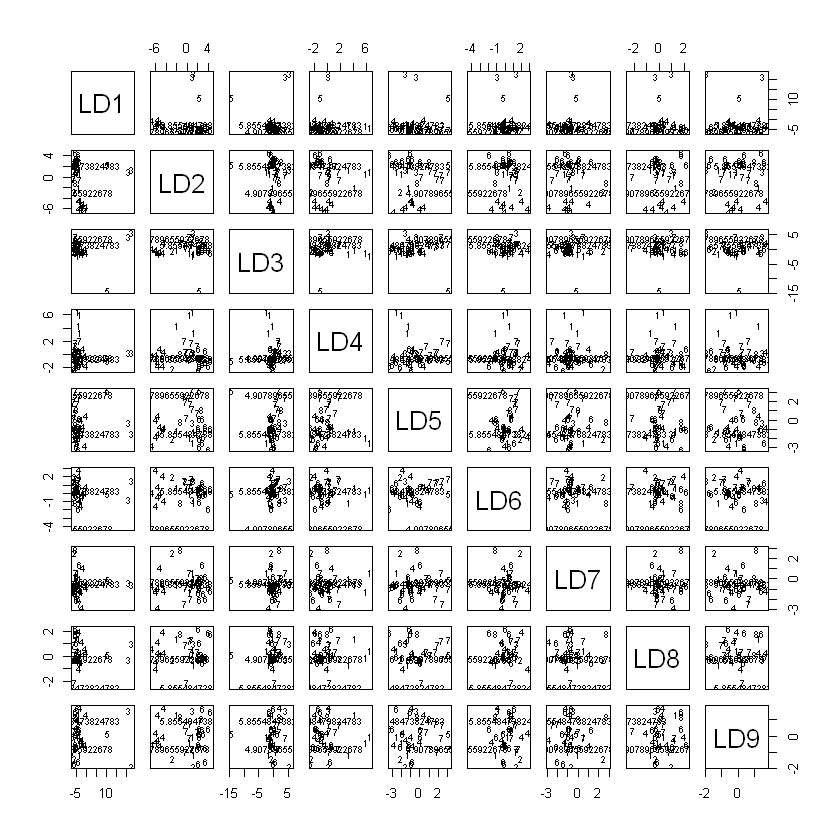

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 1 2 3
Levels: 1 2 3 4 4.90789655922678 5 5.85548473824783 6 7 8

,1,2,3,4,4.90789655922678,5,5.85548473824783,6,7,8
1,1.000000e+00,1.417229e-23,9.545597e-160,4.289782e-18,4.880297e-28,3.379713e-102,1.344975e-14,1.516185e-12,8.232394e-12,3.732887e-16
2,9.999951e-01,3.428017e-14,4.908604e-159,4.427412e-07,1.507363e-18,6.786018e-107,2.214693e-12,1.887571e-10,4.461824e-06,1.567339e-08
3,9.999761e-01,1.409951e-15,7.523395e-150,8.706285e-14,8.293173e-21,1.177920e-87,1.205368e-07,2.356893e-05,1.955065e-07,1.107994e-09
4,1.000000e+00,4.913734e-23,4.066361e-173,7.504297e-22,1.040468e-33,2.900775e-102,8.006442e-18,5.751304e-14,9.740535e-15,1.613261e-17
5,6.853269e-18,1.000000e+00,1.296610e-187,5.734291e-09,1.918020e-20,5.263137e-120,1.794198e-14,2.523435e-11,1.793493e-11,1.513113e-10
6,4.782798e-169,3.067875e-196,1.000000e+00,3.928893e-156,1.286969e-201,1.917367e-125,1.357643e-152,3.904416e-174,6.259293e-176,5.000016e-175


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9
1,-0.9391016,0.5550457,-1.3359130,5.892190,-1.4905347,-0.3544128,-0.68713248,-0.3871725,-0.4149745
2,-1.3650374,-2.0172331,-0.3477565,4.209508,-0.7356856,0.3714626,-0.01182016,1.0856227,1.3095241
3,-0.4694428,1.3180290,-1.7756612,3.224673,-0.8745354,-1.3662456,0.56682769,-0.9370512,-1.1891349


In [7]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

                  Species
Predicted           1  2  3  4 4.90789655922678  5 5.85548473824783  6  7  8
  1                 4  0  0  0                0  0                0  0  0  0
  2                 0  1  0  0                0  0                0  0  0  0
  3                 0  0  2  0                0  0                0  0  0  0
  4                 0  0  0  8                0  0                0  0  0  0
  4.90789655922678  0  0  0  0                1  0                0  0  0  0
  5                 0  0  0  0                0  1                0  0  0  0
  5.85548473824783  0  0  0  0                0  0                1  0  0  0
  6                 0  0  0  0                0  0                0 12  0  0
  7                 0  0  0  0                0  0                0  0  8  0
  8                 0  0  0  0                0  0                0  0  0  2

Overall Statistics
                                     
               Accuracy : 1         

In [8]:
spec.af <- factor(test.data$spec_as_int, levels = c("1","2","3","4","5","6","7","8"))
class.af <- factor(predictions$class, levels = c("1","2","3","4","5","6","7","8"))

In [9]:
classifier_metrics <- ml_test(class.af, spec.af, output.as.table = TRUE)
F1 <- classifier_metrics$F1
accuracy <- classifier_metrics$accuracy

In [10]:
classifier_metrics

,balanced.accuracy,DOR,F0.5,F1,F2,FDR,FNR,FOR,FPR,geometric.mean,...,L,lambda,MCC,MK,NPV,OP,precision,recall,specificity,Youden
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
2,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
3,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
4,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
5,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
6,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
7,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
8,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
